# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [ ]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np

## Get the list of stocks in the S&P 500

In [ ]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [ ]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
ticker_list = df_tickers['Symbol'].tolist()

In [ ]:
display(ticker_list[:5])

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN']

## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [ ]:
start_date = '2024-05-01'
end_date = '2025-05-01'

In [ ]:
# CODE HERE
# Use as many coding cells as you need

# Load closing prices
# Make sure you end this coding section by displaying your results: display(df_close)

df_close = yf.download(ticker_list, start=start_date, end=end_date)['Close']
display(df_close)

/tmp/ipython-input-102-445830697.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_close = yf.download(ticker_list, start=start_date, end=end_date)['Close']
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-01 -> 2025-05-01)')


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,137.376282,168.283661,154.714767,156.160004,103.735458,91.096085,293.442139,469.390015,189.859940,55.668907,...,29.172792,91.453209,51.484390,111.217087,129.094391,66.839996,132.078354,118.202553,309.049988,156.223297
2024-05-02,136.217361,171.991272,153.844177,158.330002,103.374344,90.497009,295.092743,476.570007,192.405899,56.603554,...,29.955240,93.958237,51.493961,111.418373,134.052734,70.300003,131.824600,117.115044,312.709991,164.827911
2024-05-03,138.129059,182.279160,156.695114,159.710007,103.354828,89.774330,298.403900,486.179993,195.480637,56.431885,...,30.032516,95.378410,51.934326,111.188332,135.255371,69.470001,131.112152,120.278725,309.589996,164.670197
2024-05-06,139.278107,180.619171,155.681015,162.000000,103.101067,92.370285,300.712830,493.589996,199.093948,57.404686,...,30.022860,96.522430,52.039631,111.907219,137.216995,73.529999,132.907913,119.191200,315.790009,163.566269
2024-05-07,139.931839,181.305023,155.508820,159.809998,103.618340,93.387741,305.232452,492.269989,199.338730,58.739902,...,29.800684,95.891251,52.671459,111.351280,138.035187,71.599998,132.644424,120.051315,317.869995,166.030365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,106.795090,208.097107,178.825470,121.709999,128.801849,92.099998,291.410004,360.910004,194.345154,48.284031,...,25.294355,81.371361,69.709930,107.638626,115.241966,57.500000,146.859604,101.237473,244.080002,151.792435
2025-04-25,106.056648,209.005920,184.466751,122.510002,128.274216,90.680000,293.390015,367.720001,193.708054,47.759418,...,24.609919,81.900002,68.430580,107.579178,115.730400,58.090000,146.580978,101.247452,246.240005,152.958542
2025-04-28,106.645409,209.864792,190.692963,123.300003,128.951172,91.190002,293.250000,368.619995,192.841995,47.561451,...,25.363791,81.989769,69.005791,107.638626,115.550972,58.320000,147.028778,101.496803,243.490005,153.058212


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [ ]:
# CODE HERE
# Use as many coding cells as you need

# Compute moving averages
# Make sure you end this coding section by displaying your results: display(df_ma50), display(df_ma200)

df_ma50 = df_close.rolling(window=50).mean()
df_ma200 = df_close.rolling(window=200).mean()

display(df_ma50)
display(df_ma200)

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,118.589774,219.229514,194.882048,128.497001,129.695852,91.7206,322.755805,401.392800,204.386194,46.354729,...,28.290147,82.616266,68.725403,109.007224,120.092335,60.865000,151.386326,105.303733,277.851799,158.931158
2025-04-25,117.960953,218.678437,194.779480,128.136801,129.675178,91.7690,320.885378,399.492000,204.194041,46.424616,...,28.199398,82.695181,68.768236,109.031401,119.825021,60.367001,151.415763,105.358225,275.718199,158.535975
2025-04-28,117.376369,218.051459,194.792594,127.782001,129.642279,91.7896,318.998219,397.680000,203.901112,46.480951,...,28.121558,82.734114,68.802902,109.041310,119.530667,59.847600,151.409784,105.399390,274.119598,158.320589


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,133.080366,227.101211,183.261853,130.701575,116.973860,96.197872,340.475852,478.509449,214.891999,52.358255,...,29.730782,85.165791,64.041626,111.437774,125.549300,72.28710,136.723923,106.728764,346.199799,172.881444
2025-04-25,132.988336,227.008163,183.380334,130.551875,117.119245,96.185332,340.478539,477.517949,214.720083,52.293548,...,29.719768,85.156248,64.130069,111.439660,125.467794,72.25500,136.835707,106.711043,345.854800,172.787550
2025-04-28,132.891064,226.898010,183.529515,130.409175,117.261134,96.177719,340.493398,476.538299,214.512770,52.222563,...,29.712475,85.151355,64.220807,111.437108,125.371802,72.22490,136.937422,106.688921,345.453200,172.697851


### Detecting Golden and Death Crosses in the last 14 days

In [ ]:
# CODE HERE
# Use as many coding cells as you need

# define a function that detects golden and death crosses in the last 14 days for all stocks

def detect_crosses(df_close, df_ma50, df_ma200, days_back=14):
    """
    Detects Golden and Death Crosses for all tickers in the last specified number of days.

    Args:
        df_close (pd.DataFrame): DataFrame of closing prices.
        df_ma50 (pd.DataFrame): DataFrame of 50-day moving averages.
        df_ma200 (pd.DataFrame): DataFrame of 200-day moving averages.
        days_back (int): Number of days to look back for crosses.

    Returns:
        tuple: DataFrames containing boolean values indicating Golden Cross and Death Cross events.
    """
    golden_crosses = pd.DataFrame(False, index=df_close.index, columns=df_close.columns)
    death_crosses = pd.DataFrame(False, index=df_close.index, columns=df_close.columns)

    for ticker in df_close.columns:
        required_data_points = 200 + days_back

        if len(df_ma50[ticker].dropna()) >= days_back + 1 and len(df_ma200[ticker].dropna()) >= days_back + 1:
            ma50_recent = df_ma50[ticker].dropna().tail(days_back + 1)
            ma200_recent = df_ma200[ticker].dropna().tail(days_back + 1)

            # Check for crosses in the last 'days_back' days
            for i in range(1, days_back + 1):
                if len(ma50_recent) >= i + 1 and len(ma200_recent) >= i + 1:
                    today_date = ma50_recent.index[-i]
                    yesterday_date = ma50_recent.index[-i-1]

                    # Check for Golden Cross
                    if ma50_recent.loc[today_date] > ma200_recent.loc[today_date] and ma50_recent.loc[yesterday_date] <= ma200_recent.loc[yesterday_date]:
                        golden_crosses.loc[today_date, ticker] = True
                    # Check for Death Cross
                    elif ma50_recent.loc[today_date] < ma200_recent.loc[today_date] and ma50_recent.loc[yesterday_date] >= ma200_recent.loc[yesterday_date]:
                        death_crosses.loc[today_date, ticker] = True

    # Filter to only include the last 'days_back' days from the original close price index
    last_14_days_index = df_close.index[-days_back:]
    golden_crosses = golden_crosses.loc[last_14_days_index]
    death_crosses = death_crosses.loc[last_14_days_index]

    return golden_crosses, death_crosses

df_golden_cross_14d, df_death_cross_14d = detect_crosses(df_close, df_ma50, df_ma200, days_back=14)

In [ ]:
# use the display function to show as many intermediary results
# for example display(df_golden_cross_14d)
display(df_golden_cross_14d)

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-16,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-17,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-21,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-22,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-23,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Showing top 10 stocks that had Golden Crosses in the last 14 days

# Getting the list of tickers with Golden Crosses in the last 14 days
golden_cross_tickers = df_golden_cross_14d.columns[df_golden_cross_14d.any()].tolist()

# Sorting the tickers alphabetically
golden_cross_tickers.sort()

# Selecting the top 10 tickers if there are more than 10
golden_cross_tickers_top10 = golden_cross_tickers[:10]

print("Top 10 stocks with Golden Crosses in the last 14 days (alphabetical order):")
display(golden_cross_tickers_top10)

Top 10 stocks with Golden Crosses in the last 14 days (alphabetical order):


['AMT', 'CI', 'EW', 'INVH', 'KDP', 'MDLZ', 'MOH', 'NEM', 'SBAC', 'SJM']

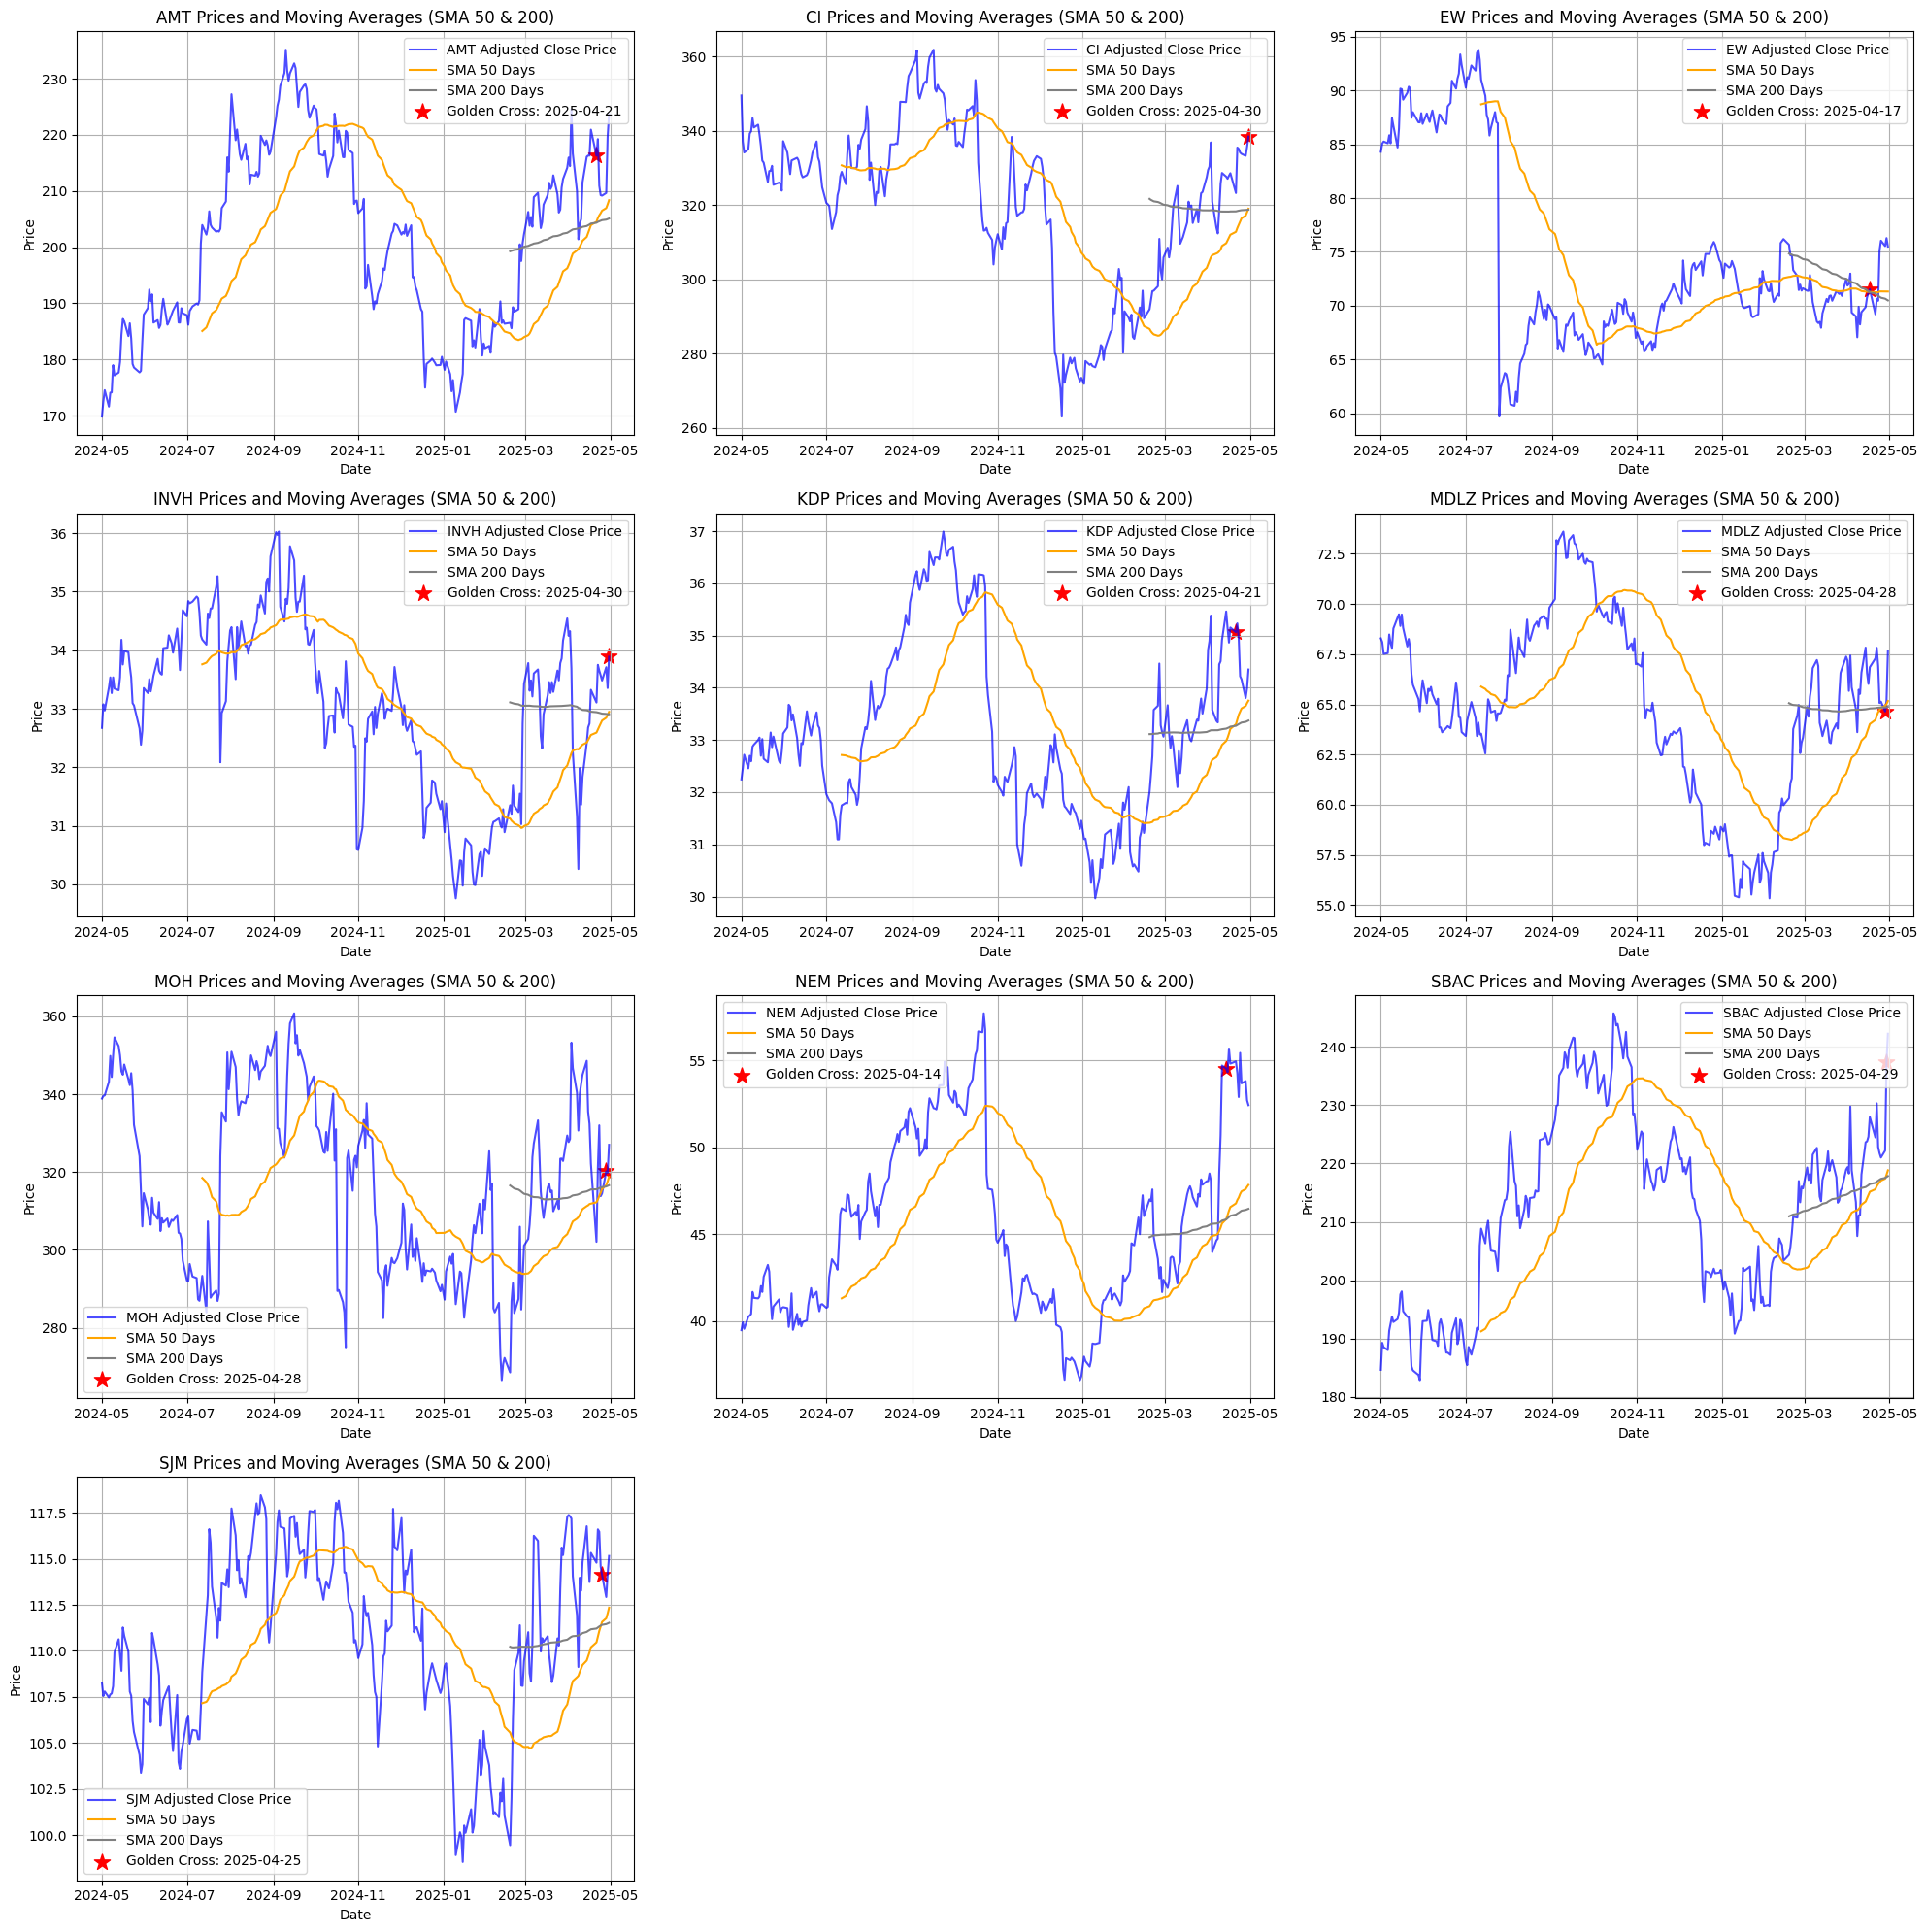

In [ ]:
# Plot MA50, MA200, and Golden Crosses for the top 10 tickers

num_tickers = len(golden_cross_tickers_top10)
n_cols = 3
n_rows = (num_tickers + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, ticker in enumerate(golden_cross_tickers_top10):
    ax = axes[i]
    ax.plot(df_close.index, df_close[ticker], label=f'{ticker} Adjusted Close Price', color='blue', alpha=0.7)
    ax.plot(df_ma50.index, df_ma50[ticker], label='SMA 50 Days', color='orange')
    ax.plot(df_ma200.index, df_ma200[ticker], label='SMA 200 Days', color='gray')

    # Mark Golden Crosses with dates
    golden_cross_dates = df_golden_cross_14d.index[df_golden_cross_14d[ticker]]
    for date in golden_cross_dates:
        ax.scatter(date, df_close.loc[date, ticker], marker='*', color='green', s=150, label=f'Golden Cross: {date.strftime("%Y-%m-%d")}')

    # Getting the volatility for the current ticker and add it to the title
    ticker_volatility = volatility.get(ticker, np.nan)
    ax.set_title(f'{ticker} Prices & MAs (SMA 50 & 200)\nVolatility: {ticker_volatility:.4f}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# use the display function to show as many intermediary results
# for example display(df_death_cross_14d)
display(df_death_cross_14d)

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-10,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-16,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-17,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-21,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-22,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-04-23,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Showing top 10 stocks that had Death Crosses in the last 14 days

# Getting the list of tickers with Death Crosses in the last 14 days
death_cross_tickers = df_death_cross_14d.columns[df_death_cross_14d.any()].tolist()

# Sorting the tickers alphabetically
death_cross_tickers.sort()

# Selecting the top 10 tickers if there are more than 10
death_cross_tickers_top10 = death_cross_tickers[:10]

print("Top 10 stocks with Death Crosses in the last 14 days (alphabetical order):")
display(death_cross_tickers_top10)

Top 10 stocks with Death Crosses in the last 14 days (alphabetical order):


['ACN', 'ADSK', 'AME', 'AMP', 'AMZN', 'APD', 'APO', 'AXP', 'BAC', 'BLK']

In [ ]:
print(f"Number of stocks with Death Crosses in the last 14 days: {len(death_cross_tickers)}")

Number of stocks with Death Crosses in the last 14 days: 62


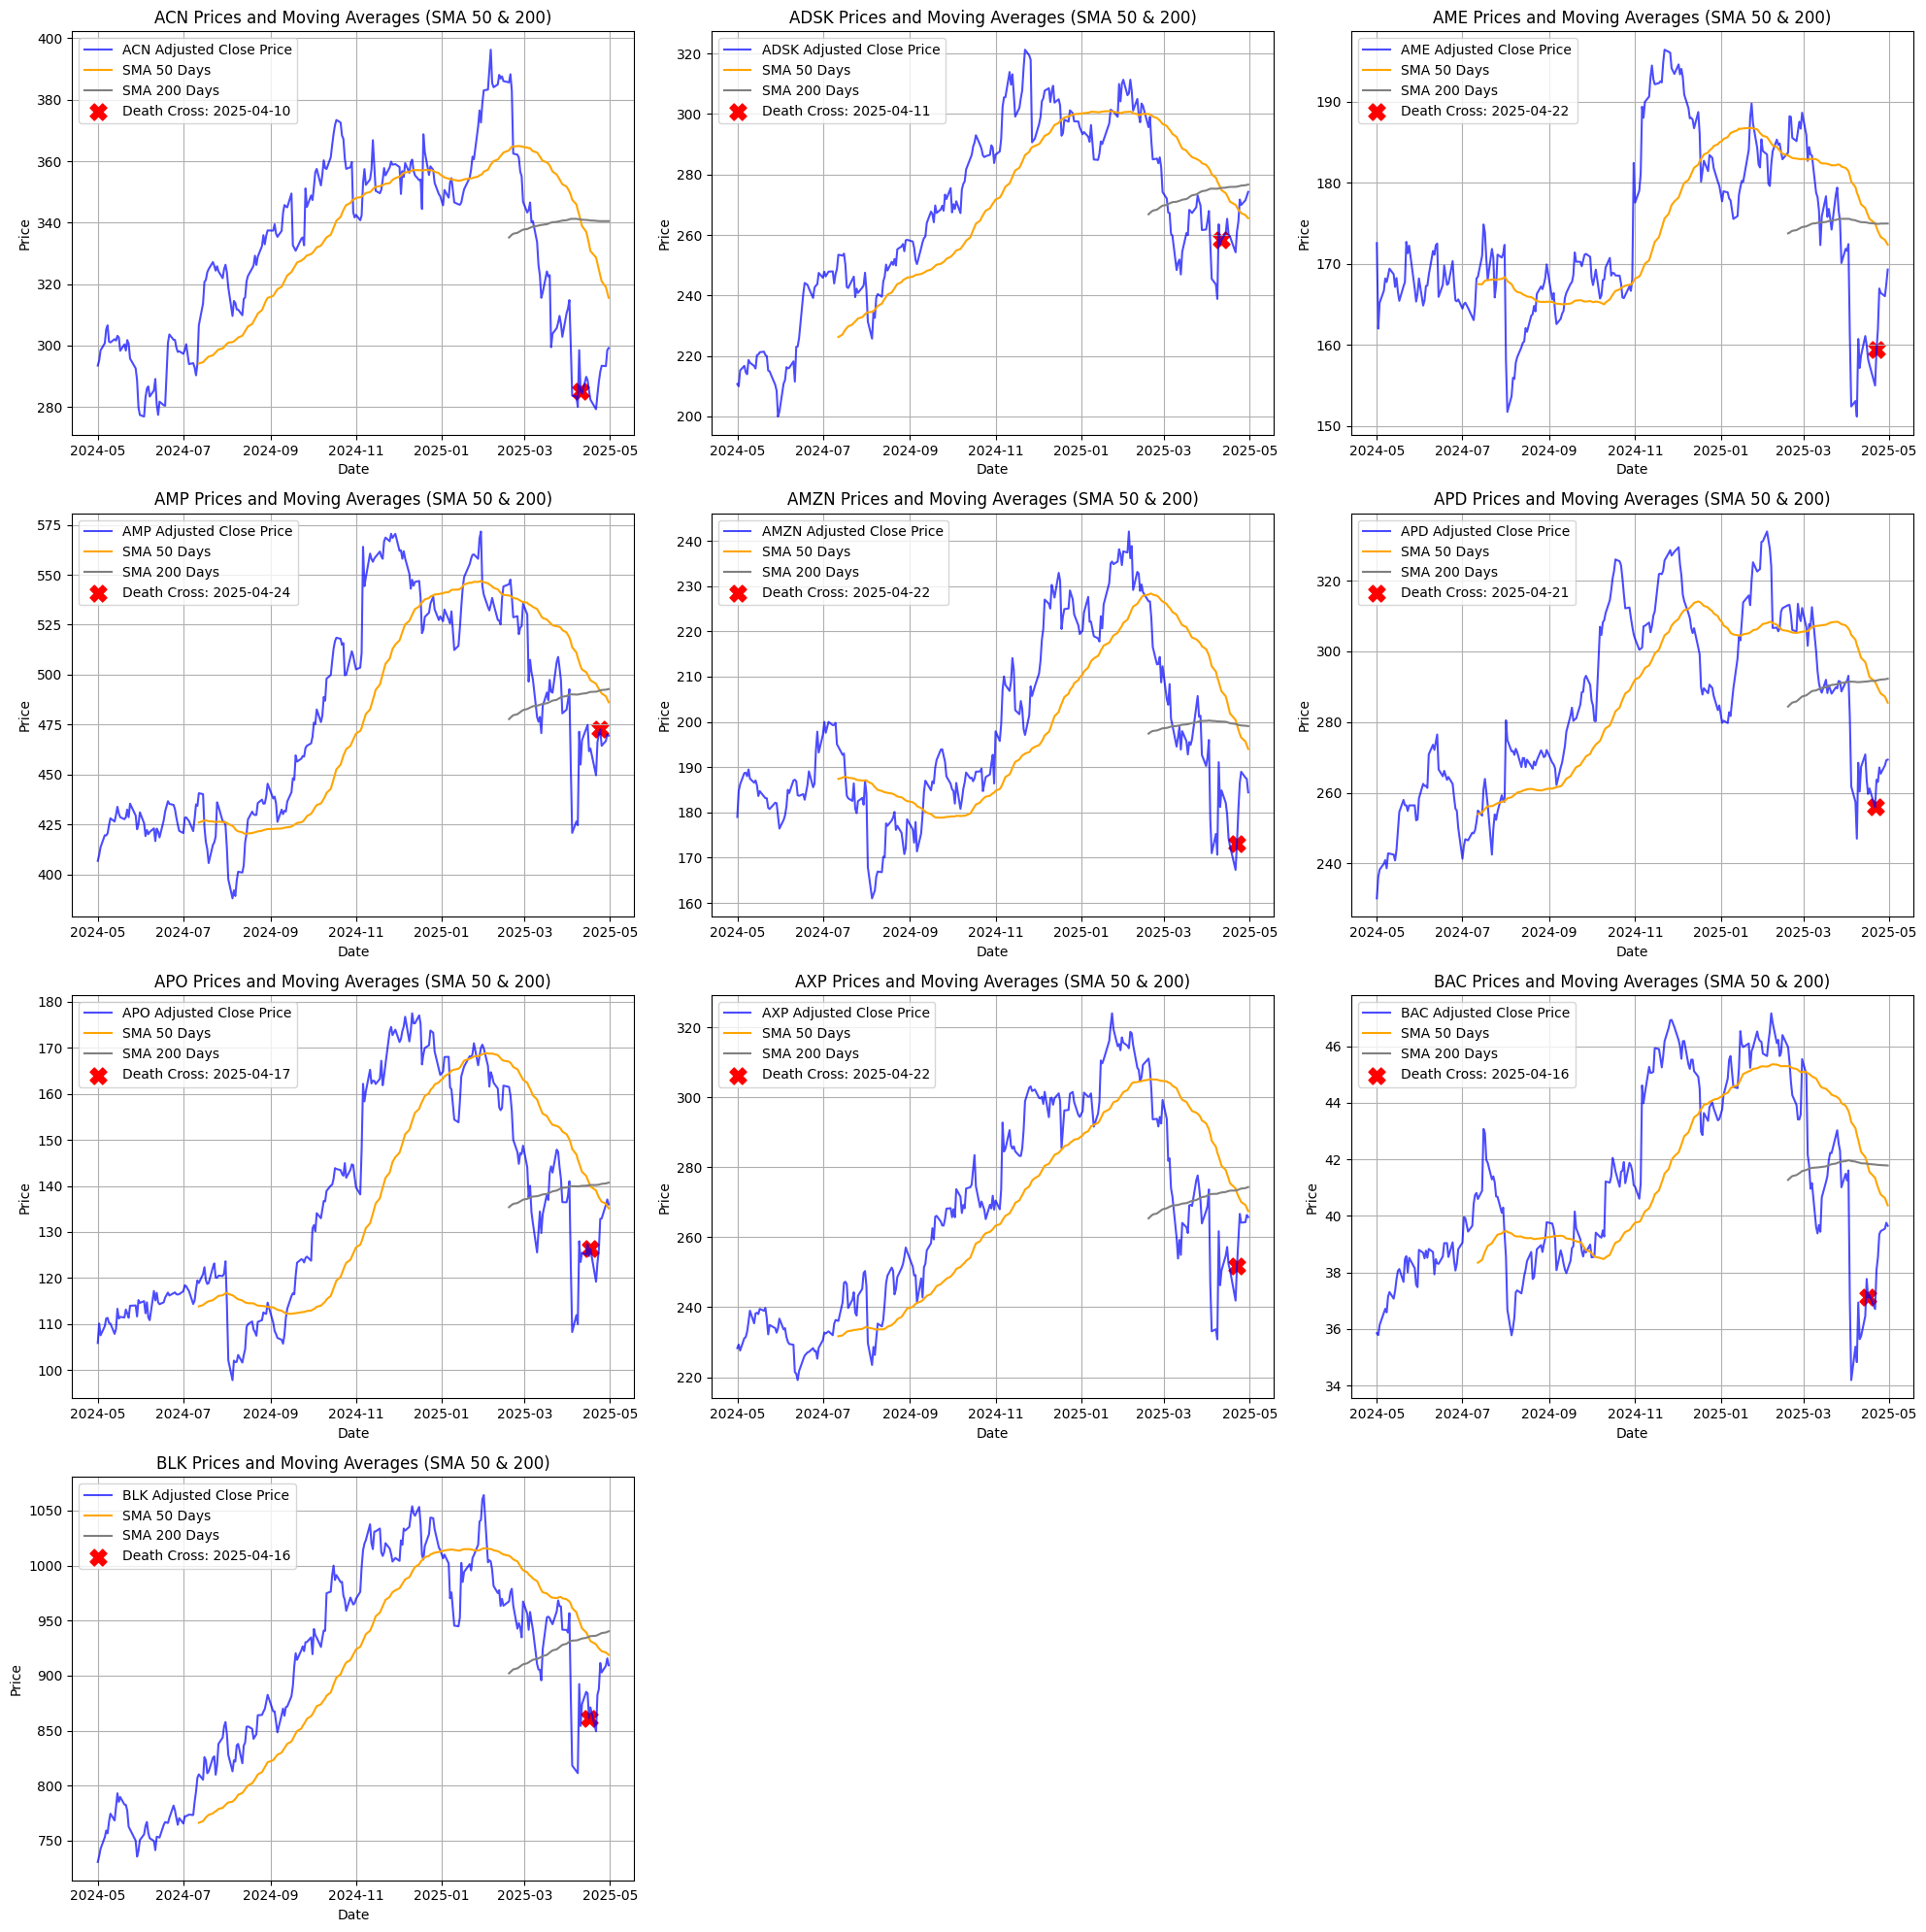

In [ ]:
# Plot MA50, MA200, and Death Crosses for the top 10 tickers

num_tickers = len(death_cross_tickers_top10)
n_cols = 3
n_rows = (num_tickers + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, ticker in enumerate(death_cross_tickers_top10):
    ax = axes[i]
    ax.plot(df_close.index, df_close[ticker], label=f'{ticker} Adjusted Close Price', color='blue', alpha=0.7)
    ax.plot(df_ma50.index, df_ma50[ticker], label='SMA 50 Days', color='orange')
    ax.plot(df_ma200.index, df_ma200[ticker], label='SMA 200 Days', color='gray')

    # Mark Death Crosses with dates
    death_cross_dates = df_death_cross_14d.index[df_death_cross_14d[ticker]]
    for date in death_cross_dates:
        ax.scatter(date, df_close.loc[date, ticker], marker='X', color='red', s=150, label=f'Death Cross: {date.strftime("%Y-%m-%d")}')

    # Getting the volatility for the current ticker and add it to the title
    ticker_volatility = volatility.get(ticker, np.nan)
    ax.set_title(f'{ticker} Prices & MAs (SMA 50 & 200)\nVolatility: {ticker_volatility:.4f}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

In [ ]:
print("Top 10 stocks with Golden Crosses in the last 14 days (alphabetical order):")
display(golden_cross_tickers_top10)

Top 10 stocks with Golden Crosses in the last 14 days (alphabetical order):


['AMT', 'CI', 'EW', 'INVH', 'KDP', 'MDLZ', 'MOH', 'NEM', 'SBAC', 'SJM']

YOUR WRITTEN RESPONSE HERE

#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days:

In [ ]:
print("Top 10 stocks with Death Crosses in the last 14 days (alphabetical order):")
display(death_cross_tickers_top10)

Top 10 stocks with Death Crosses in the last 14 days (alphabetical order):


['ACN', 'ADSK', 'AME', 'AMP', 'AMZN', 'APD', 'APO', 'AXP', 'BAC', 'BLK']

YOUR WRITTEN RESPONSE HERE

### Visualization of the results
(in alphabetical order)

#### Compute the volatility of every stock and print it in the title of each plot

In [ ]:
# CODE HERE
# Use as many coding cells as you need

# Compute the volatility of every stock in the S&P 500
# Volatility is often measured as the standard deviation of daily returns (percentage change)

daily_returns = df_close.pct_change()
volatility = daily_returns.std()

# Display the first few volatility values
display(volatility.head())

/tmp/ipython-input-158-3444349086.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df_close.pct_change()


,0
Ticker,
A,0.018595
AAPL,0.020583
ABBV,0.017048
ABNB,0.026069
ABT,0.012995


#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

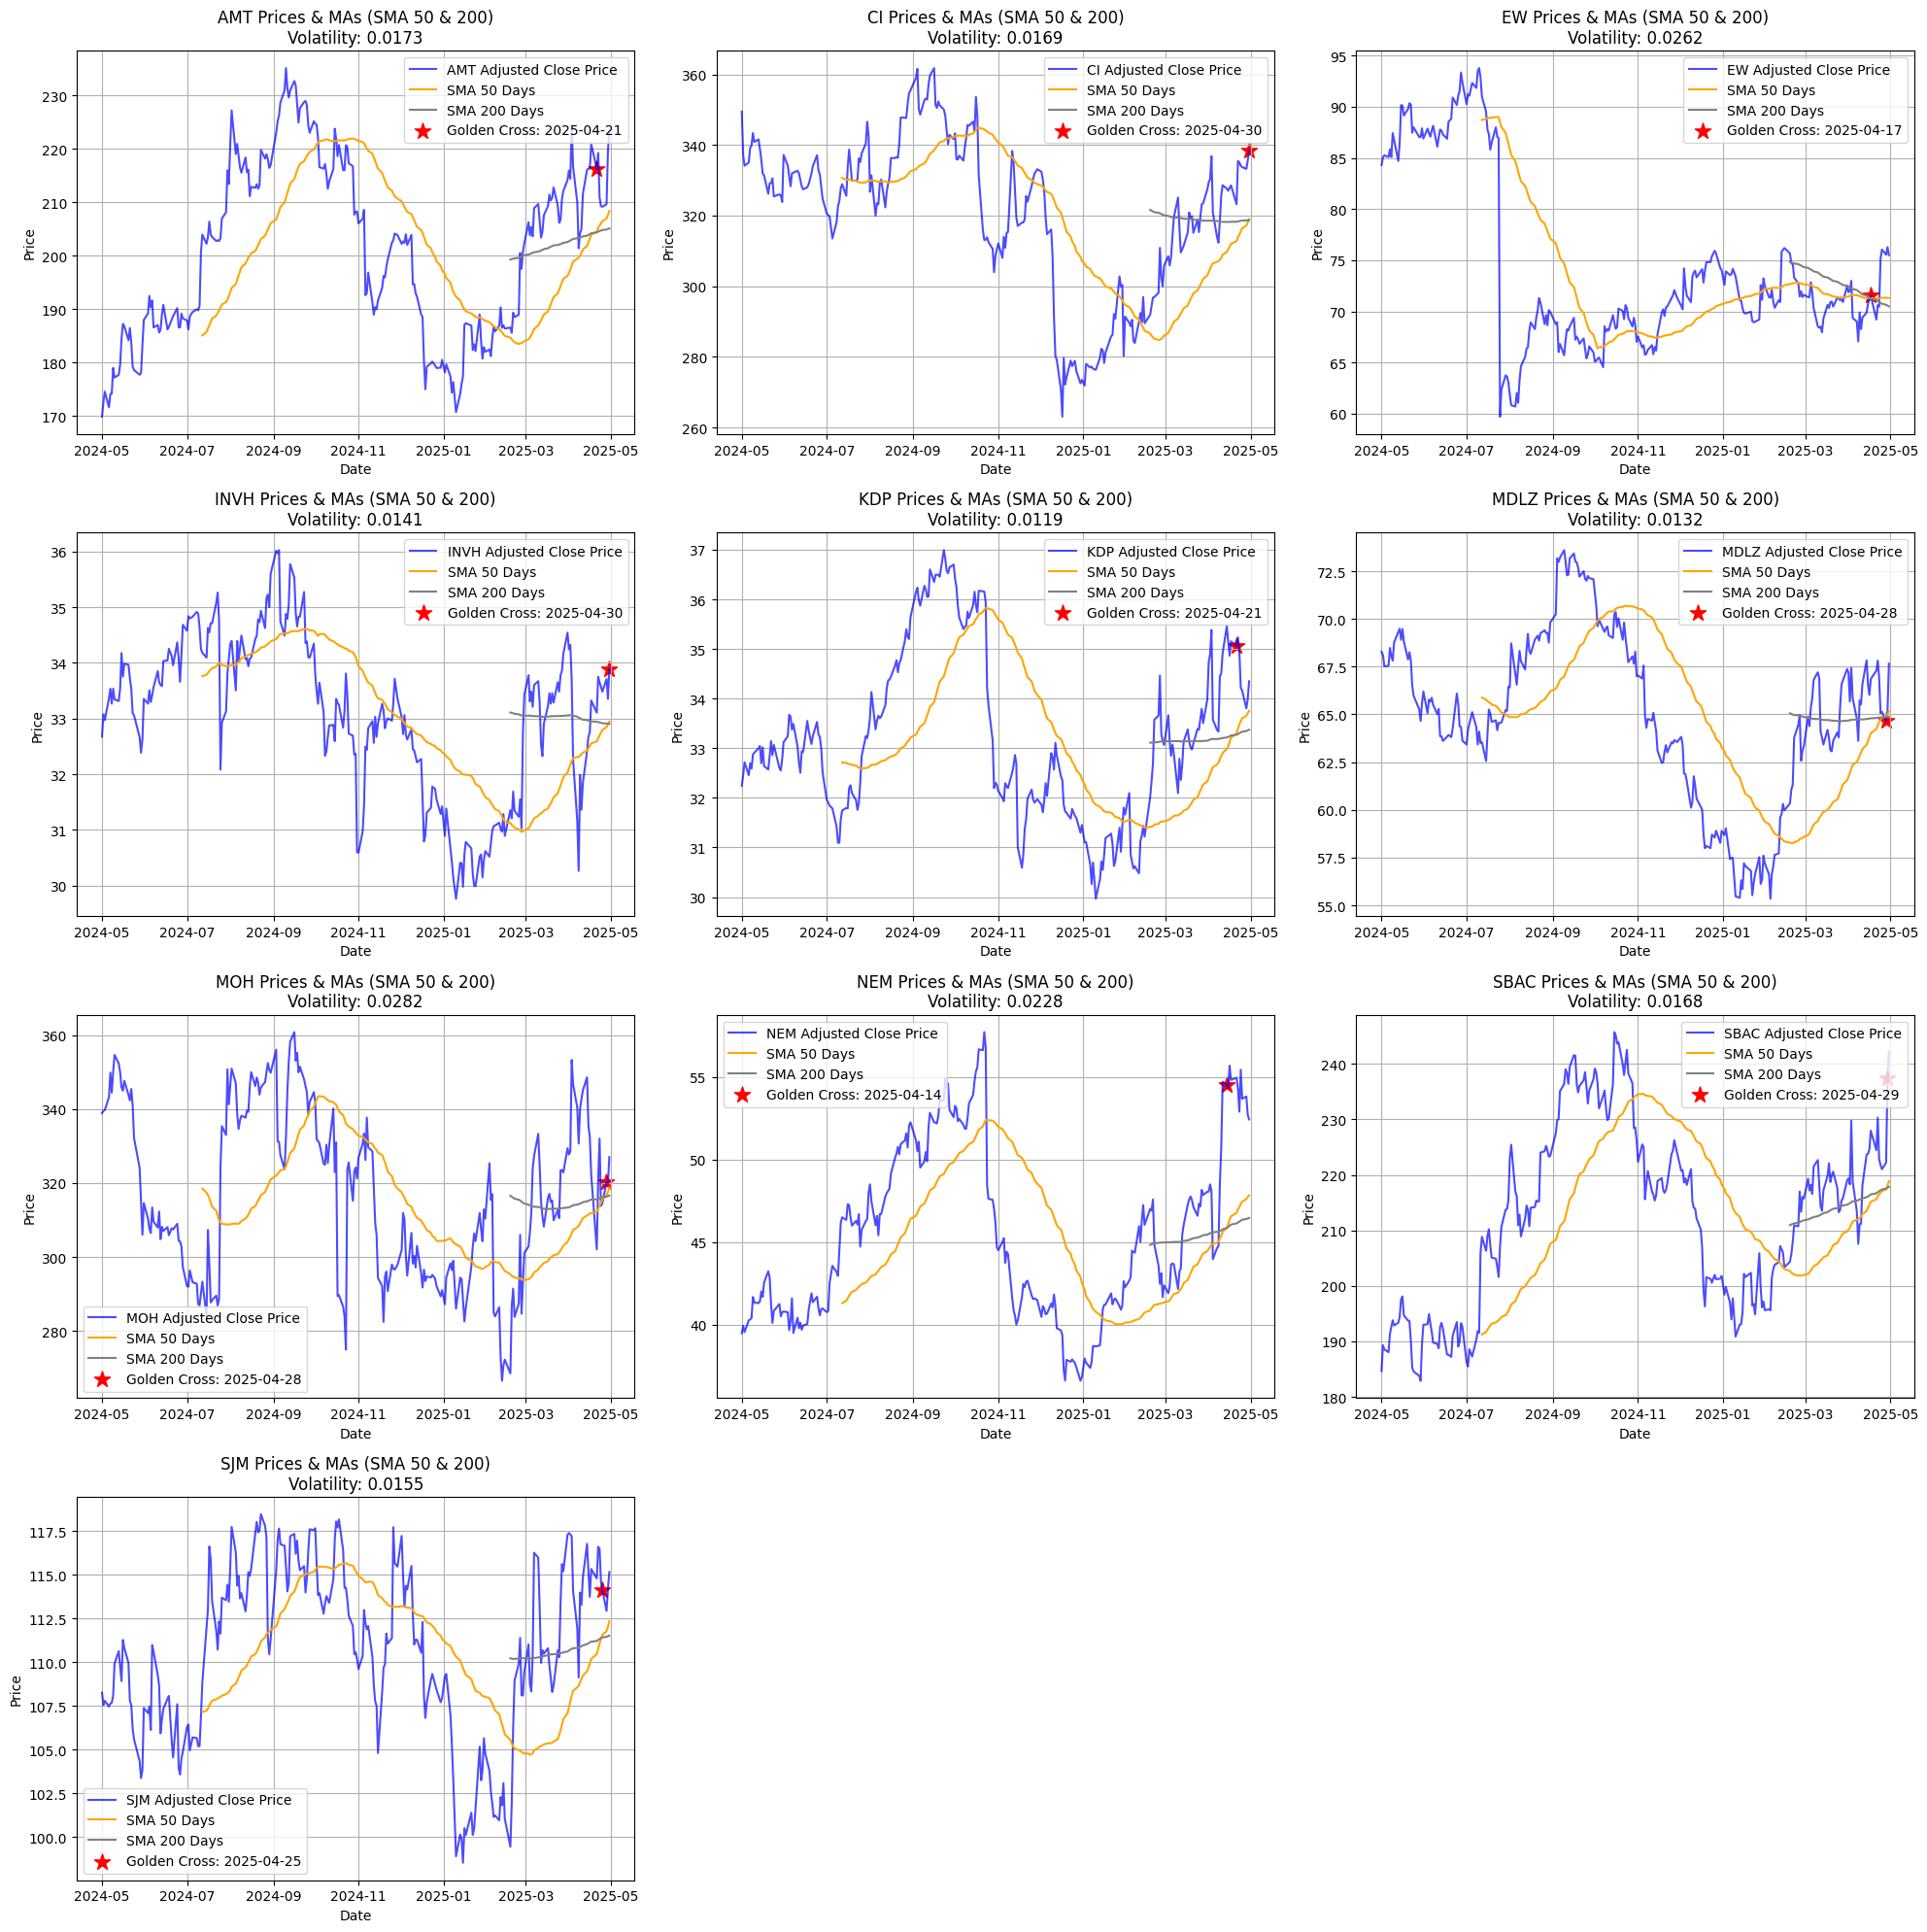

In [ ]:
# CODE HERE
# Visualize the results here
# Plot MA50, MA200, and Golden Crosses for the top 10 tickers

num_tickers = len(golden_cross_tickers_top10)
n_cols = 3
n_rows = (num_tickers + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, ticker in enumerate(golden_cross_tickers_top10):
    ax = axes[i]
    ax.plot(df_close.index, df_close[ticker], label=f'{ticker} Adjusted Close Price', color='blue', alpha=0.7)
    ax.plot(df_ma50.index, df_ma50[ticker], label='SMA 50 Days', color='orange')
    ax.plot(df_ma200.index, df_ma200[ticker], label='SMA 200 Days', color='gray')

    # Mark Golden Crosses with dates
    golden_cross_dates = df_golden_cross_14d.index[df_golden_cross_14d[ticker]]
    for date in golden_cross_dates:
        ax.scatter(date, df_close.loc[date, ticker], marker='*', color='red', s=150, label=f'Golden Cross: {date.strftime("%Y-%m-%d")}')

    # Get the volatility for the current ticker and add it to the title
    ticker_volatility = volatility.get(ticker, np.nan)
    ax.set_title(f'{ticker} Prices & MAs (SMA 50 & 200)\nVolatility: {ticker_volatility:.4f}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

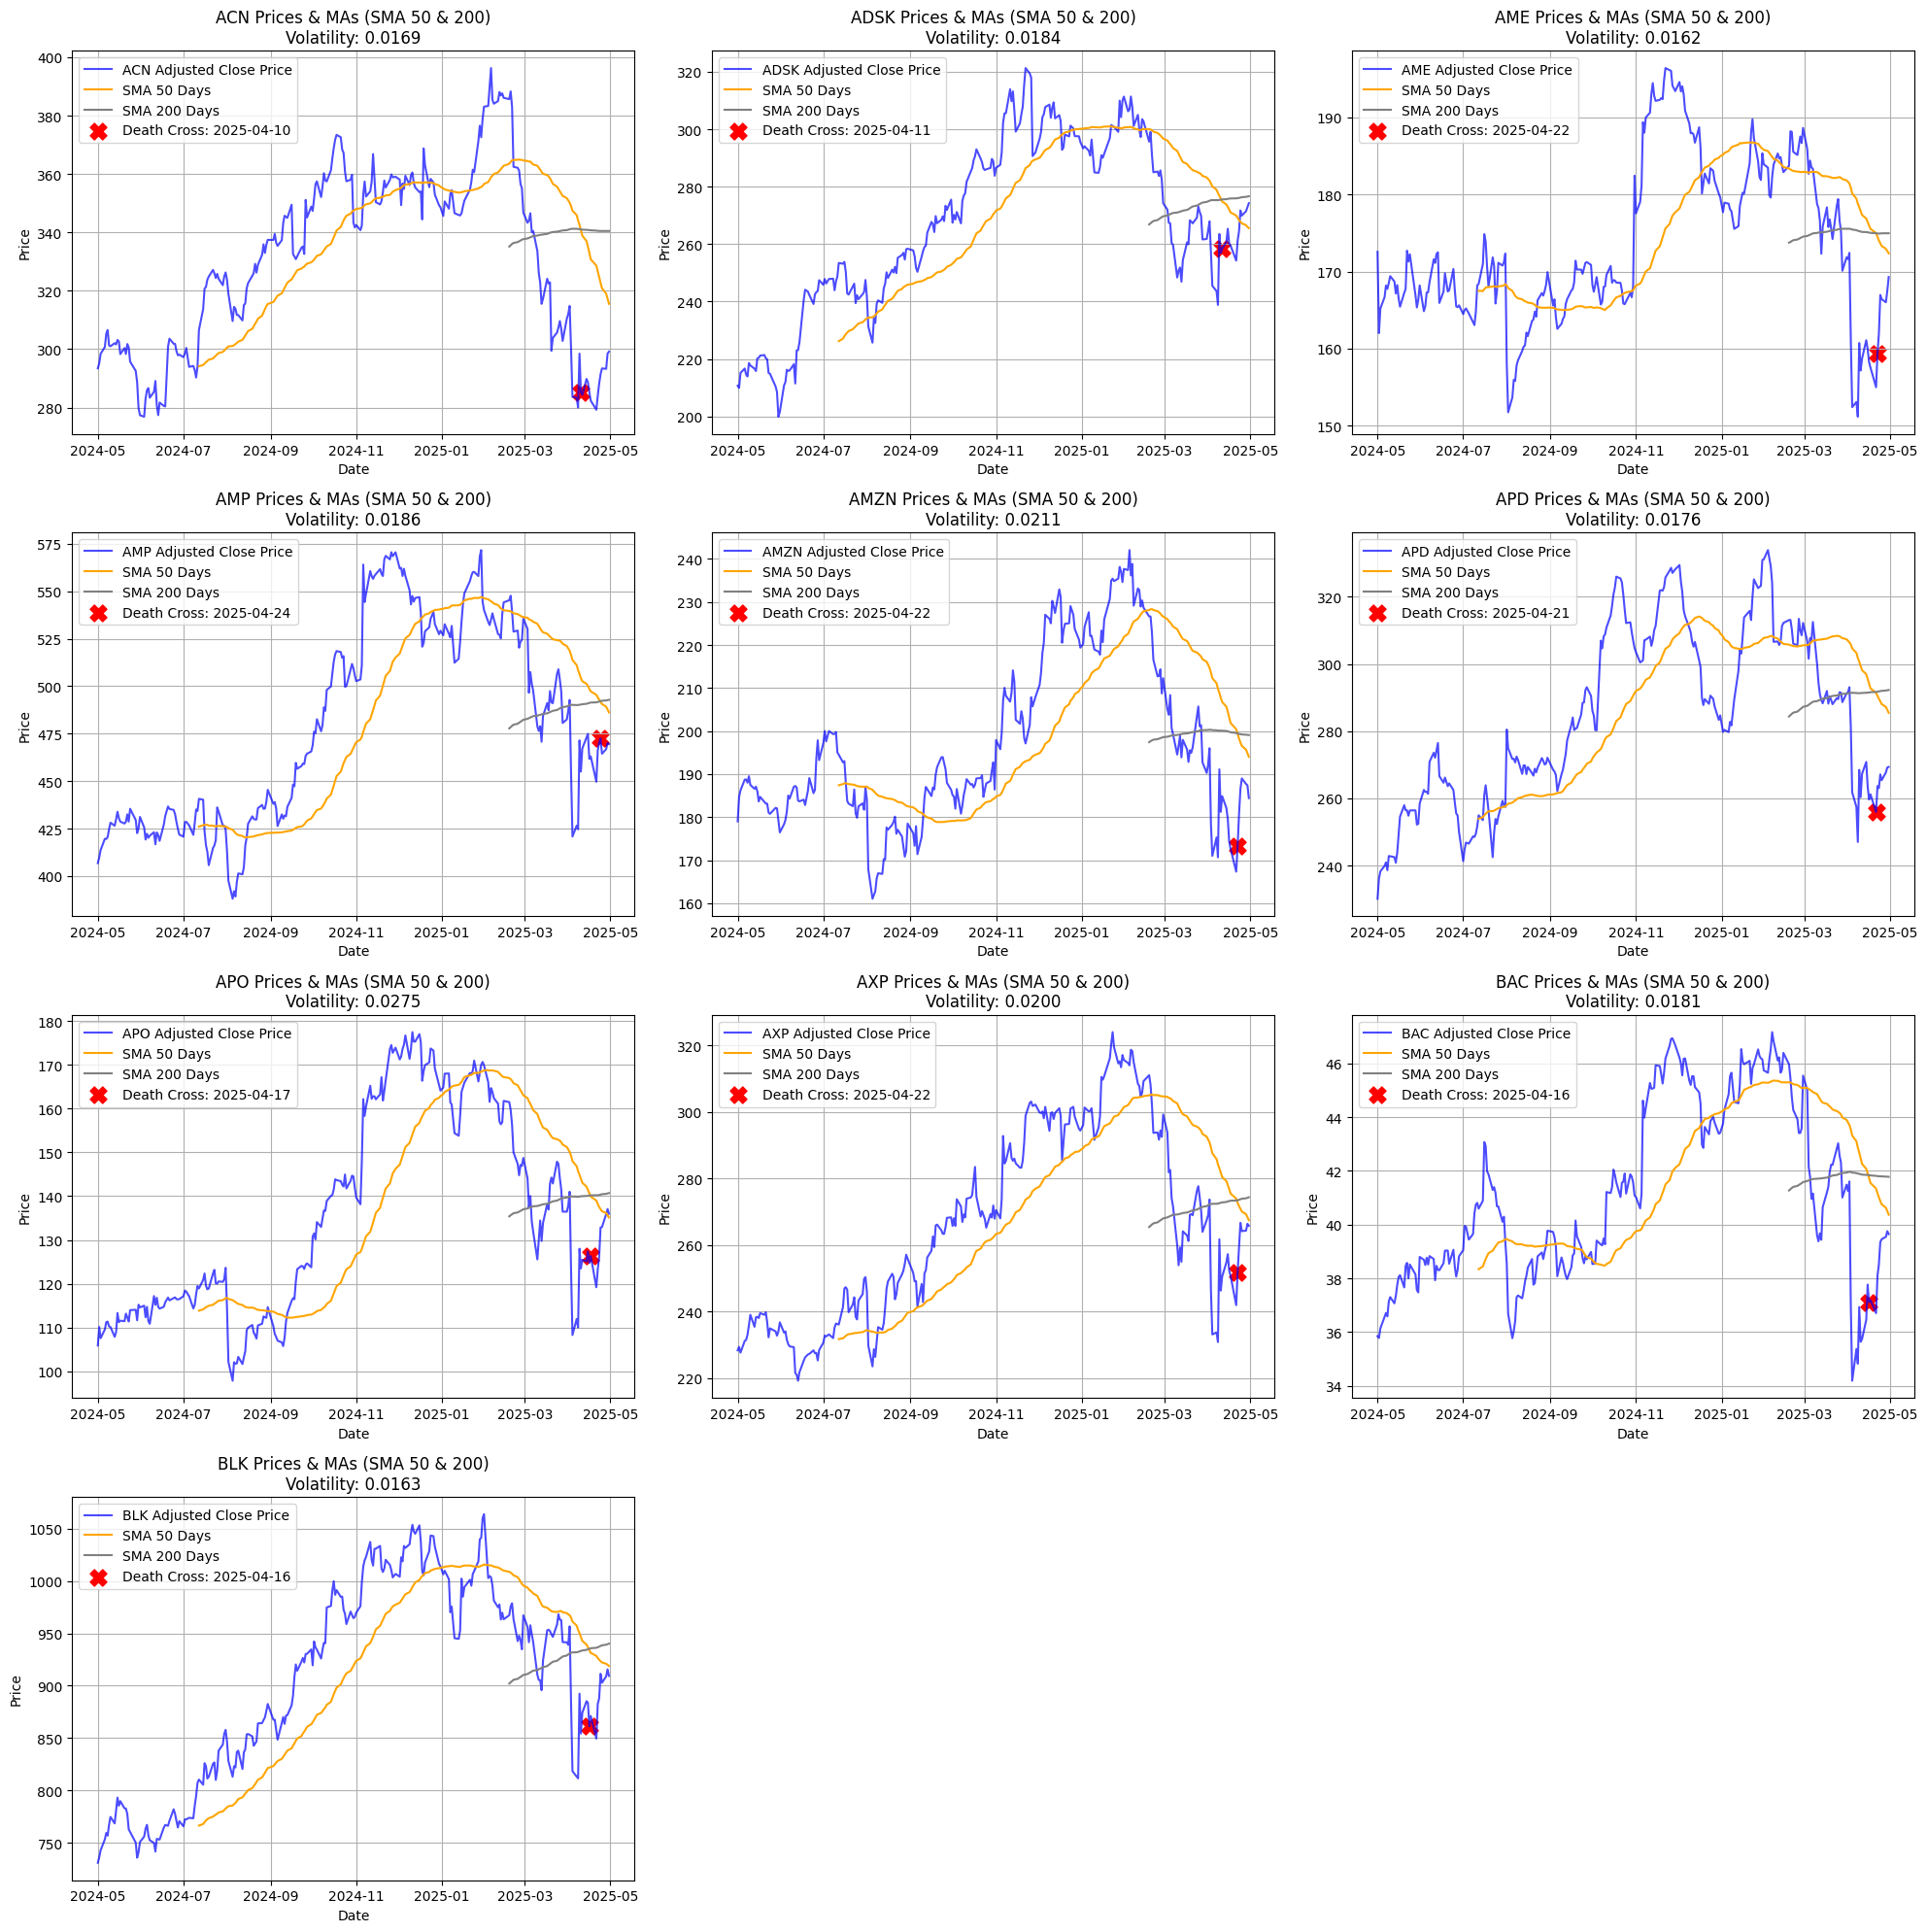

In [ ]:
# CODE HERE
# Visualize the results here
# Plot MA50, MA200, and Death Crosses for the top 10 tickers

num_tickers = len(death_cross_tickers_top10)
n_cols = 3
n_rows = (num_tickers + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, ticker in enumerate(death_cross_tickers_top10):
    ax = axes[i]
    ax.plot(df_close.index, df_close[ticker], label=f'{ticker} Adjusted Close Price', color='blue', alpha=0.7)
    ax.plot(df_ma50.index, df_ma50[ticker], label='SMA 50 Days', color='orange')
    ax.plot(df_ma200.index, df_ma200[ticker], label='SMA 200 Days', color='gray')

    # Mark Death Crosses with dates
    death_cross_dates = df_death_cross_14d.index[df_death_cross_14d[ticker]]
    for date in death_cross_dates:
        ax.scatter(date, df_close.loc[date, ticker], marker='X', color='red', s=150, label=f'Death Cross: {date.strftime("%Y-%m-%d")}')

    # Get the volatility for the current ticker and add it to the title
    ticker_volatility = volatility.get(ticker, np.nan)
    ax.set_title(f'{ticker} Prices & MAs (SMA 50 & 200)\nVolatility: {ticker_volatility:.4f}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

A Golden Cross is a technical chart pattern that occurs when a stock's or asset's short-term moving average (commonly the 50-day moving average) crosses above its long-term moving average (commonly the 200-day moving average).

It is typically interpreted by technical analysts and traders as a bullish signal, suggesting the potential for a significant upward price movement. It indicates that recent price momentum is accelerating relative to longer-term price trends, which could signal the start of a new upward trend or confirm an existing one.



#### What is a Death Cross and how might market participants react to it?

It is a technical chart formation that occurs when the short-term moving average (usually the 50-day moving average) of a share or an asset drops below its long-term moving average (usually the 200-day moving average).

It is usually interpreted by technical analysts and traders as a **bearish signal**, suggesting the probability of a sharp price fall. Market participants can react to a Death Cross by:

* **Selling their positions**: To avoid potential losses if
they believe that the price will continue to drop.
* **Shorting the stock**: Betting on the price falling.
* **Becoming more cautious**: Reducing exposure slightly to the asset or the market as a whole.
* **Waiting for confirmation**: Some traders may wait for other price activity or signals before making a trading decision.



#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

Moving averages (e.g., MA50 and MA200) are used in technical analysis primarily to smooth out the price data and to find underlying trends by removing noise. They are used by traders to gauge market momentum and can also act as dynamic support or resistance levels. Crossovers of different moving averages are used to generate trading signals, e.g., Golden Cross and Death Cross, which form the basis of trend identification and potential points of entry/exit. Their simplicity and popularity make them effective tools for the majority of analysts and traders.



#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

Seeking crosses in the last 14 days places emphasis on recent trend reversals. This means the analysis captures signals that are useful in generating timely trading calls, but not the previous crosses. Focusing on this brief recent period may also encompass more false signals. In total, this choice assigns greater significance to the identification of developing trends for potential short-term actionability compared to a long-term historical perspective.



#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

Volatility, generally measured by the standard deviation of daily returns, indicates the magnitude to which a stock price fluctuates. Increasing volatility around a Golden or Death Cross suggests that the price movement confirming the cross was steep or that the market responded with vigor, possibly indicating an unstable or rapid trend reversal. Low volatility, in contrast, signals a more tranquil or less conclusive price action at the cross and may signify a less powerful signal or less immediate follow-through. It informs us about the nature of the price behavior within the signal.


### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

To measure if Golden Crosses make profitable trades, you would typically use backtesting. This is accomplished by simulating trades with historical data:

Compute all the Golden Cross signals in the historical data.
For each signal, purchase the stock.
Create an exit strategy (e.g., sell on a Death Cross, after a specific time period, or at a target profit/loss).
Calculate profit or loss on each simulated trade.
Compare statistics like average profit per trade, win percentage, profit and risk-adjusted return (e.g., Sharpe Ratio) to evaluate the strategy's performance over time.


#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

Dependence on technical indicators only like moving averages is risky since they don't consider the health or value of a company. You can ignore very crucial information about earnings, debt, industry changes, or economic factors that significantly impact the stock price. This can lead to misleading signals where the technical pattern is established but the fundamentals of the stock do not comply with the implied trend, putting you at risk of incurring losses. It is like driving while paying attention to the speedometer and ignoring the fuel gauge or state of road.

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

To reduce false signals from Golden or Death Crosses, filters or confirmation signals can be introduced. This can involve:

Using other technical indicators: Confirming the cross using indicators like RSI, MACD, or volume.
Looking at volume: Seek high volume trading with the cross for added conviction.
Assessing the market environment: Check if the overall trend of the market supports the signal.
Including fundamental analysis: Ensure that the company fundamentals validate the technical signal. The additions are used to validate the signal before entering into a trade.


### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

News sentiment would definitely be in a position to validate or invalidate technical signals. A Golden Cross with positive news for a company (like positive earnings or launch of a new product) would validate the bull signal, increasing optimism. A Golden Cross under negative news (like a scandal or poor bottom line) would invalidate the signal, calling for caution despite the technical pattern. News sentiment provides valuable context that technical indicators alone cannot, and provides added context.


### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

From a trader's perspective, it is not advisable and not fully actionable on its own to rely on this moving average crossover technique exclusively. While Golden and Death Crosses provide signals, they are prone to false signals, as well as whipsaws, especially in volatile or sideways markets. Professional traders usually supplement these signals with other technical indicators, fundamental analysis, risk management rules, and market context to make their trading decisions more reliable. Relying solely on it raises the risk of unprofitable trades.


#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

From volatility alone in a Golden Cross, it is not possible to infer that such crosses always portend rising action. Great volatility might signal big price swings but either way or may indicate instability. While a Golden Cross may suggest potential bulliness, volatility only measures the magnitude of price swings, not their direction following the signal. Rising consistently demands persistent buying pressure over and above the mere volatility at the cross point.


#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:

* **Recognized Recent Trend Signals**: We can recognize a list of recent S&P 500 stocks that had significant technical trend signals (Golden and Death Crosses) in the last 14 days, which can provide potential near-term insights.
* **Volatility Provides Context to the Signals**: The report incorporates volatility measurements with the technical signals, providing valuable context for the size and character of price action leading up to these critical crossover points.


Caveats in 2 or 3 bullet points:

* **Technical Indicators Only**: The analysis is technical only (moving averages) and does not involve fundamental analysis, so crucial to determine the company's intrinsic value and longer-term future.
* **Risk of False Signals & Whipsaws**: Moving averages crossovers, especially in extremely volatile markets, can generate false signals or whipsaws that do not lead to sustained price movement, and thus might turn out as losing trades if used in isolation.
* **Limited Lookback Period**: Visiting the last 14 days alone for detecting crosses means that we are not observing historic trend changes or the general strategy history, which might make us see things differently.